This Project uses the Twitter API to access data from X (formerly known as twitter). 

It gathers data from X (I chose the @POTUS account) and analysis is run on this data using the NLTK library which performs sentiment analysis. In order to accomplish this, the data had to first be cleansed by removing stopwords etc. 

I also used the matplotlib library to represent the data using graphs and charts. 

In [28]:
import tweepy
import json

def auth():
    
    api_key = '5RQDi76JygaJ8GZ5y8LA6wqGs'
    api_secret = 'Z2p6K3K7RRIHYo55rfkmU2MBeiYKAMSw3yV9tP8CLqWmZWEhOA'
    access_token = '1462049284002500615-JNSEThxiZnMDJz2bxpYpARuvyEwRGD'
    access_token_secret = 'vJTrGcfJXep6xKzQIQglwDtpPp5HUxeKlQr1lgY8z0P3u'
 
    auth = tweepy.OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)
    return api

In [47]:
theAPI = auth()

tweetCount = 20

results = theAPI.user_timeline(id='@POTUS', count=tweetCount)

    # or search_tweets.  or whatever you like from the tweepy api...
    # results = theAPI.search_tweets(q="roger federer")
    
listOTweets = []
time_frame = []  
for tweet in results:
    print(tweet.text)
    listOTweets.append(tweet.text)
    time_frame.append(tweet.created_at)

Unexpected parameter: id


It only costs $10 to make a bottle of insulin. But drug companies charge some families 30 times more than that.
 
R… https://t.co/wOQQqEZjIN
Some drug companies charge families 30 times more than what it costs to make a bottle of insulin.
 
Imagine being a… https://t.co/UQSNKO9T7z
Instead of “Infrastructure Week” being a punch line under my predecessor, “Infrastructure Decade” is a headline on… https://t.co/gEfNjvWqpU
I ran for president to give the middle class some breathing room in dealing with costs. But despite our progress, p… https://t.co/s22EZ2roLo
America is reasserting ourselves as a leader in infrastructure.
 
We’re proving our best days are ahead of us. https://t.co/ykCJt8vhjH
Last year, we saved a family of four with health coverage through the Affordable Care Act an average of $2,400.
 
T… https://t.co/vabUtcHsXg
If Republicans in Congress get their way, prices will go up and inflation will get worse.  
 
It’s that simple.
Today marks the beginning of Medicare's open enro

In [30]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stops = stopwords.words('english')

i = 0
while(i<len(listOTweets)):
    listOTweets[i] = listOTweets[i].lower()
    listOTweets[i] = listOTweets[i].replace('\n', ' ')
    listOTweets[i] = listOTweets[i].replace('.', ' ')
    listOTweets[i] = listOTweets[i].replace(';', ' ')
    listOTweets[i] = listOTweets[i].replace(',', ' ')
    
    URLless_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', listOTweets[i])
    listOTweets[i] = URLless_string
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(listOTweets[i]) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    listOTweets[i] = ' '.join(filtered_sentence)
    i+=1
    
print(listOTweets)

['drug companies charge families 30 times costs make bottle insulin imagine a… co/uqsnko9t7z', 'instead “ infrastructure week ” punch line predecessor “ infrastructure decade ” headline on… co/gefnjvwqpu', 'ran president give middle class breathing room dealing costs despite progress p… co/s22ez2rolo', 'america reasserting leader infrastructure ’ proving best days ahead us co/ykcjt8vhjh', 'last year saved family four health coverage affordable care act average $ 2 400 t… co/vabutchsxg', 'republicans congress get way prices go inflation get worse ’ simple', "today marks beginning medicare 's open enrollment period seniors pick plans next year wil… co/sxxlxcuo2s", "pay prescription drugs nation world 's outrageous instead of… co/j3fvy71pnu", 'tune deliver remarks portland oregon lowering costs american families co/ypkwc4yfs0', 'whether voted ’ leaving anyone behind promised ’ president america co/zsivccgegi', 'years ’ check high fast drug companies raise prices ’ outrageous t… co/bnuow6m

In [32]:
from textblob import TextBlob


def getSubjectivity(paras):
    return TextBlob(paras).sentiment.subjectivity
for w in listOTweets:
    reviewSubjectivity = getSubjectivity(w)
    print(w)
    print()
    print("TextBlob subjectivity: ", reviewSubjectivity)
    print()
    print()

drug companies charge families 30 times costs make bottle insulin imagine a… co/uqsnko9t7z

TextBlob subjectivity:  0.0


instead “ infrastructure week ” punch line predecessor “ infrastructure decade ” headline on… co/gefnjvwqpu

TextBlob subjectivity:  0.0


ran president give middle class breathing room dealing costs despite progress p… co/s22ez2rolo

TextBlob subjectivity:  0.0


america reasserting leader infrastructure ’ proving best days ahead us co/ykcjt8vhjh

TextBlob subjectivity:  0.3


last year saved family four health coverage affordable care act average $ 2 400 t… co/vabutchsxg

TextBlob subjectivity:  0.2333333333333333


republicans congress get way prices go inflation get worse ’ simple

TextBlob subjectivity:  0.47857142857142854


today marks beginning medicare 's open enrollment period seniors pick plans next year wil… co/sxxlxcuo2s

TextBlob subjectivity:  0.25


pay prescription drugs nation world 's outrageous instead of… co/j3fvy71pnu

TextBlob subjectivity:  1

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    print(sentence) 
    print("Overall vader sentiment dictionary is : ", sentiment_dict)
    print('\n')
for review in listOTweets:
    sentiment_scores(review)

drug companies charge families 30 times costs make bottle insulin imagine a… co/uqsnko9t7z
Overall vader sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


instead “ infrastructure week ” punch line predecessor “ infrastructure decade ” headline on… co/gefnjvwqpu
Overall vader sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


ran president give middle class breathing room dealing costs despite progress p… co/s22ez2rolo
Overall vader sentiment dictionary is :  {'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.3252}


america reasserting leader infrastructure ’ proving best days ahead us co/ykcjt8vhjh
Overall vader sentiment dictionary is :  {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}


last year saved family four health coverage affordable care act average $ 2 400 t… co/vabutchsxg
Overall vader sentiment dictionary is :  {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.7184}


republicans congress 

In [40]:
posWords = []
with open('poswords.txt') as f:
    posWords = f.readlines()
i = 0
while(i<len(posWords)):
    
    size = len(posWords[i])
    newWord = posWords[i][:size - 1]
    posWords[i] = newWord
    i+=1
negWords = []
with open('negwords.txt') as f:
    negWords = f.readlines()
i = 0
while(i<len(negWords)):
    
    size = len(negWords[i])
    newWord = negWords[i][:size - 1]
    negWords[i] = newWord
    i+=1
 

goodWords = []
badWords = []
neuWords = []
i=0
while(i<len(tokens)):
    if(tokens[i] in posWords):
        goodWords.append(tokens[i])
    elif(tokens[i] in negWords):
        badWords.append(tokens[i])
    else:
        neuWords.append(tokens[i])
    i+=1


Positive Words


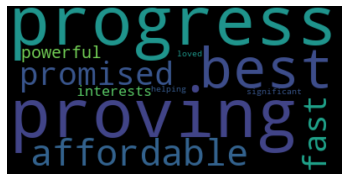

Negative Words


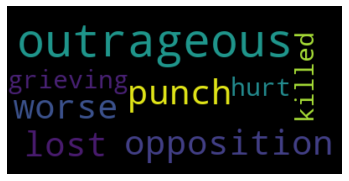

Neutral Words


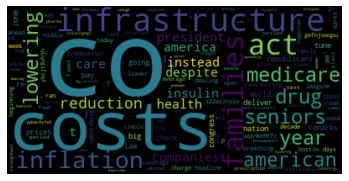

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def cloudMaker(werds):
    wrod = ''
    i=0
    while (i<len(werds)):
        wrod+=werds[i] + ' '
        i+=1
    
    wordcloud = WordCloud().generate(wrod)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
print('Positive Words')    
cloudMaker(goodWords)
print('Negative Words')
cloudMaker(badWords)
print('Neutral Words')
cloudMaker(neuWords)

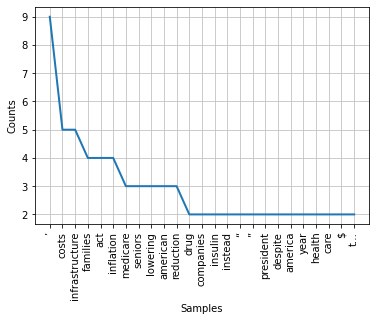

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
allTweets = ' '.join(listOTweets)
tokens = word_tokenize(allTweets)
freq = nltk.FreqDist(tokens)
freq.plot(25, cumulative=False)

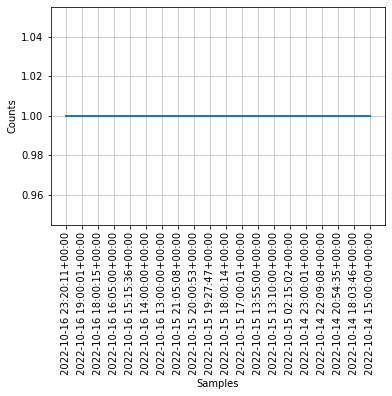

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [54]:
freq1 = nltk.FreqDist(time_frame)
freq1.plot(25, cumulative=False)

In [31]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm') 

for tweet in results:
    doc = nlp(tweet.text)
  #  print(tweet.text)
    displacy.render((doc), jupyter=True, style='ent')